In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import plot_distribution


In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


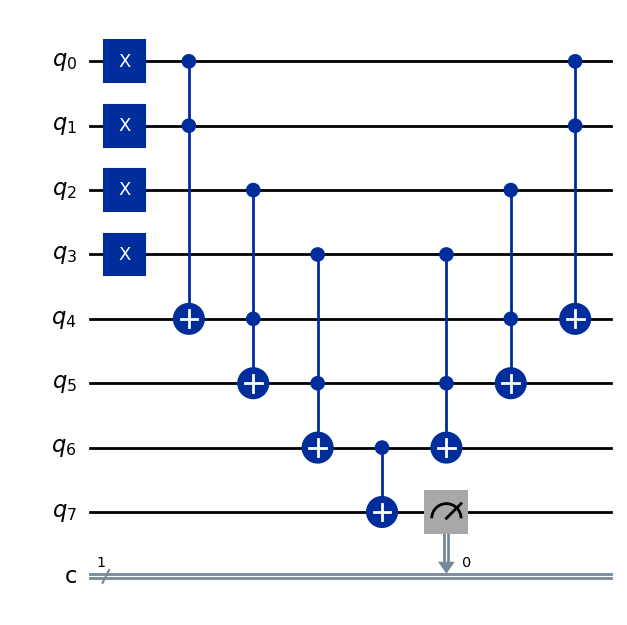

In [3]:
#initializing  quantum circuit



qc = QuantumCircuit(8,1)   #N = 8 qubits and 1 classical bit. Now I want to meke only one mesuriment, so I need just one classical bit


#Implementing a cnot-gate

#First change q0=0 to q0=1 using the  X-gate

qc.x(0)

#Do the same to q1, q2, q3

qc.x(1)

qc.x(2)

qc.x(3)

#Aply toffoli-gate to {q0, q1, q4}={control, control, target}

#Remember that when the control =1, the target changes

qc.ccx(0, 1, 4)

#Aply toffoli-gate to {q2, q4, q5}={control, control, target}

qc.ccx(2, 4, 5)

#Aply toffoli-gate to {q3, q5, q6}={control, control, target}

qc.ccx(3,5,6)

#Aply cnot-gate to {q6, q7}={control,  target}

qc.cx(6,7)

#Aply toffoli-gate to {q3, q5, q6}={control, control, target}

qc.ccx(3, 5,6)

#Aply toffoli-gate to {q2, q4, q5}={control, control, target}

qc.ccx(2,4,5)

#Aply toffoli-gate to {q0, q1, q4}={control, control, target}

qc.ccx(0,1,4)

qc.measure(7,0) #measure qubit 7 with the classical bit


qc.draw("mpl")



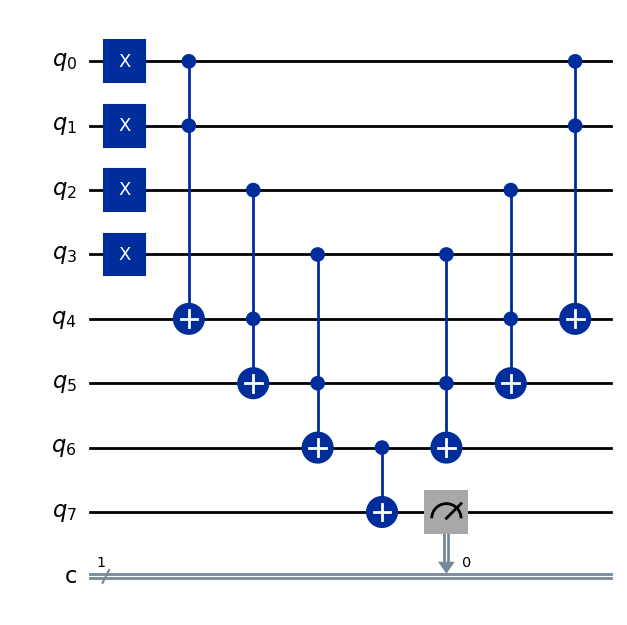

In [4]:

#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. 
#In this case, instead to write "meas", I used c. Because I specified the measured qubit (see circuit)  


#counts
print('RESULT ', counts)


RESULT  {'1': 1000}


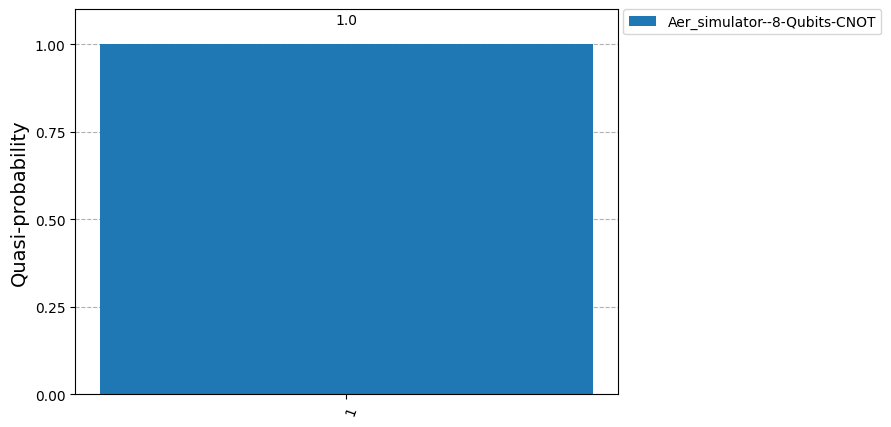

In [6]:
plot_distribution([counts], legend = ['Aer_simulator--8-Qubits-CNOT'])